<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 1st exercise: <font color="#C70039">Work with standard deviations for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   24.11.2025
* Student: Tim Voßmerbäumer
* Matr.Nr.: 11474232
test

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for getting into standard deviations as a common technique to detect anomalies when the data is normally distributed. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several calories_burned, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. go and find three different data sets on the web 
    * kaggle.com might be a good source (they also offer an API for data download)
    * make sure two of the three data sets are normally distributed
    * download one data set that is not normally distributed
5. visualize the data
6. compute the anomalies
7. visualize the anomalies
8. does the 0,3% rule apply?
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
10. which statement can be made and which cannot? 
-----------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy.random import randn
np.random.seed(1)

### Dataset Imports

In [2]:
# Not normally distributed
df_nnorm = pd.read_csv("data/Ex1/Coca_Cola_historical_data.csv") 
# First normally distributed
df_norm1 = pd.read_csv("data/Ex1/random_fitness_dataset.csv") 
# Second normally distributed
df_norm2 = pd.read_csv("data/Ex1/SOCR-HeightWeight.csv") 

### Function Declaration

In [3]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off
    
    print("lower limit=", round(lower_limit,8))
    print("upper limit=", round(upper_limit,8))
    
    # Generate outliers list
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    
    return anomalies

## Outlier Detection

In [35]:
df_nnorm_anomalies = find_anomalies(df_nnorm["Close"])
df_nnorm_anomalies

lower limit= -38.37217411
upper limit= 64.67167798


[65.25647735595703,
 65.52644348144531,
 66.84739685058594,
 65.66143798828125,
 65.61322784423828,
 66.00853729248047,
 66.26888275146484,
 66.22065734863281,
 65.72892761230469,
 66.00853729248047,
 66.12425231933594,
 66.19174194335938,
 66.7027587890625,
 66.50993347167969,
 66.89559936523438,
 67.07878875732422,
 66.84739685058594,
 67.2909164428711,
 68.30331420898438,
 68.93968200683594,
 69.18073272705078,
 69.4699935913086,
 69.87495422363281,
 70.39561462402344,
 69.96172332763672,
 68.62150573730469,
 68.59257507324219,
 69.27714538574219,
 68.98789978027344,
 68.53473663330078,
 68.67935943603516,
 69.32494354248047,
 69.99478912353516,
 69.70355987548828,
 69.6550064086914,
 68.5580062866211,
 69.5482177734375,
 69.6355972290039,
 69.24727630615234,
 69.36376190185547,
 69.31523895263672,
 69.69385528564453,
 69.76179504394531,
 69.61618041992188,
 68.9366226196289,
 68.46092224121094,
 68.12113952636719,
 66.99502563476562,
 67.16004943847656,
 67.53865814208984,
 67.2280

In [36]:
df_norm1_anomalies = find_anomalies(df_norm1["calories_burned"])
df_norm1_anomalies

lower limit= -65.02113883
upper limit= 656.55113883


[]

In [37]:
df_norm2_anomalies = find_anomalies(df_norm2['Height(Inches)'])
df_norm2_anomalies

lower limit= 62.28819139
upper limit= 73.69803581


[73.90107,
 73.83364,
 62.01666,
 74.24899,
 74.19488,
 75.1528,
 73.99549,
 75.11519,
 60.61265,
 61.8934,
 74.03777,
 74.28376,
 60.8634,
 62.23548,
 61.59011,
 73.72628,
 61.4055,
 73.81695,
 73.85521,
 73.95409,
 74.2727,
 73.75335,
 74.05895,
 61.30021,
 61.93152,
 74.36328,
 73.88574,
 74.16797,
 60.86977,
 74.74047,
 60.27836,
 74.04804,
 61.90725,
 74.59993,
 74.25069,
 74.47517,
 73.88318,
 74.8489,
 74.2957,
 74.01942,
 61.827,
 62.05222,
 60.8062,
 74.42744,
 74.51784,
 61.5772,
 74.19842,
 61.92639,
 73.95494,
 62.26498,
 74.53177]

### Result
These anomalies are exceeding the lower and upper 3rd scatter range.
Thus, statistically spoken, they do belong to a population size of less than 0,3% of the entire data set! 
For sure, the above conclusion is true if and only if the data is normally distributed!


In [38]:
print(df_nnorm_anomalies)

[65.25647735595703, 65.52644348144531, 66.84739685058594, 65.66143798828125, 65.61322784423828, 66.00853729248047, 66.26888275146484, 66.22065734863281, 65.72892761230469, 66.00853729248047, 66.12425231933594, 66.19174194335938, 66.7027587890625, 66.50993347167969, 66.89559936523438, 67.07878875732422, 66.84739685058594, 67.2909164428711, 68.30331420898438, 68.93968200683594, 69.18073272705078, 69.4699935913086, 69.87495422363281, 70.39561462402344, 69.96172332763672, 68.62150573730469, 68.59257507324219, 69.27714538574219, 68.98789978027344, 68.53473663330078, 68.67935943603516, 69.32494354248047, 69.99478912353516, 69.70355987548828, 69.6550064086914, 68.5580062866211, 69.5482177734375, 69.6355972290039, 69.24727630615234, 69.36376190185547, 69.31523895263672, 69.69385528564453, 69.76179504394531, 69.61618041992188, 68.9366226196289, 68.46092224121094, 68.12113952636719, 66.99502563476562, 67.16004943847656, 67.53865814208984, 67.22801208496094, 67.53865814208984, 68.28617858886719, 

In [39]:
print(df_norm1_anomalies)

[]


In [40]:
print(df_norm2_anomalies)

[73.90107, 73.83364, 62.01666, 74.24899, 74.19488, 75.1528, 73.99549, 75.11519, 60.61265, 61.8934, 74.03777, 74.28376, 60.8634, 62.23548, 61.59011, 73.72628, 61.4055, 73.81695, 73.85521, 73.95409, 74.2727, 73.75335, 74.05895, 61.30021, 61.93152, 74.36328, 73.88574, 74.16797, 60.86977, 74.74047, 60.27836, 74.04804, 61.90725, 74.59993, 74.25069, 74.47517, 73.88318, 74.8489, 74.2957, 74.01942, 61.827, 62.05222, 60.8062, 74.42744, 74.51784, 61.5772, 74.19842, 61.92639, 73.95494, 62.26498, 74.53177]


## Visualization

### Not normalized Data

In [41]:
is_anomaly = df_nnorm["Close"].isin(df_nnorm_anomalies)

df_nnorm_anomalies_for_plotting = df_nnorm["Close"].where(is_anomaly)

### Check for normal distribution

Text(0.5, 1.0, 'Histogram of Close Prices')

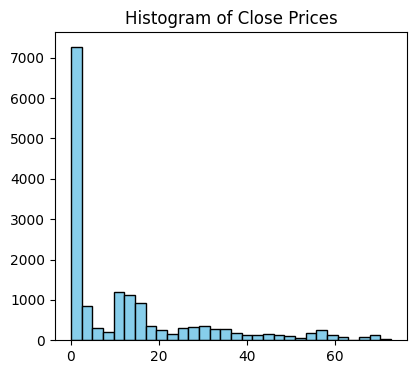

In [42]:
data = df_nnorm["Close"]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, edgecolor='black', color='skyblue')
plt.title(f'Histogram of Close Prices')

In [43]:
data_to_test = df_nnorm["Close"]

statistic, p_value = stats.shapiro(data_to_test)

print(f"Shapiro-Wilk Test for df_nnorm['Close']:\nTest Statistic: {statistic}\nP-value: {p_value}")

Shapiro-Wilk Test for df_nnorm['Close']:
Test Statistic: 0.7706399526177126
P-value: 9.014410346310703e-91


c:\Users\Tim\Desktop\Studium\uni-work\AML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16066.
  res = hypotest_fun_out(*samples, **kwds)


### Plotting

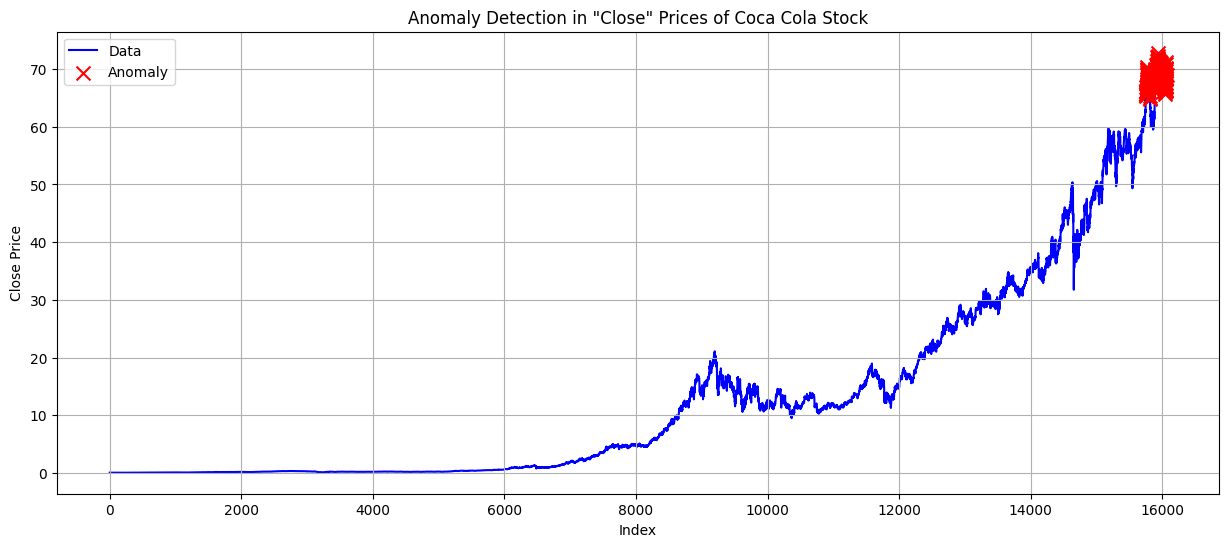

In [44]:
plt.figure(figsize=(15, 6))


plt.plot(df_nnorm["Close"].index, df_nnorm["Close"], label='Data', color='blue', zorder=1)

plt.scatter(df_nnorm_anomalies_for_plotting.index, df_nnorm_anomalies_for_plotting, color='red', marker='x', s=100, label='Anomaly', zorder=2)

plt.title('Anomaly Detection in "Close" Prices of Coca Cola Stock')
plt.xlabel('Index') 
plt.ylabel('Close Price')
plt.legend() 
plt.grid(True) 

plt.show()

### Normal Distribution 1

In [45]:
is_anomaly = df_norm1["calories_burned"].isin(df_norm1_anomalies)

df_norm1_anomalies_for_plotting = df_norm1["calories_burned"].where(is_anomaly)

### Check for normal distribution

Text(0.5, 1.0, 'Histogram of burned calories')

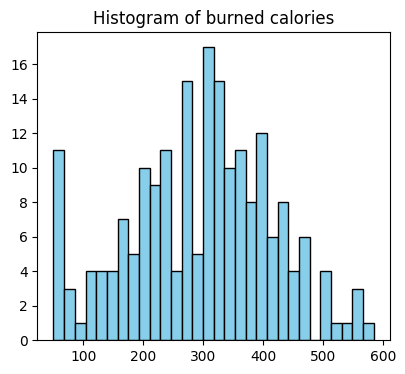

In [46]:
data = df_norm1["calories_burned"]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, edgecolor='black', color='skyblue')
plt.title(f'Histogram of burned calories')

In [47]:
data_to_test = df_norm1['calories_burned']

statistic, p_value = stats.shapiro(data_to_test)

print(f"Shapiro-Wilk Test for df_norm1['calories_burned']:\nTest Statistic: {statistic}\nP-value: {p_value}")

Shapiro-Wilk Test for df_norm1['calories_burned']:
Test Statistic: 0.9863369629152907
P-value: 0.050657961677663704


### Plotting

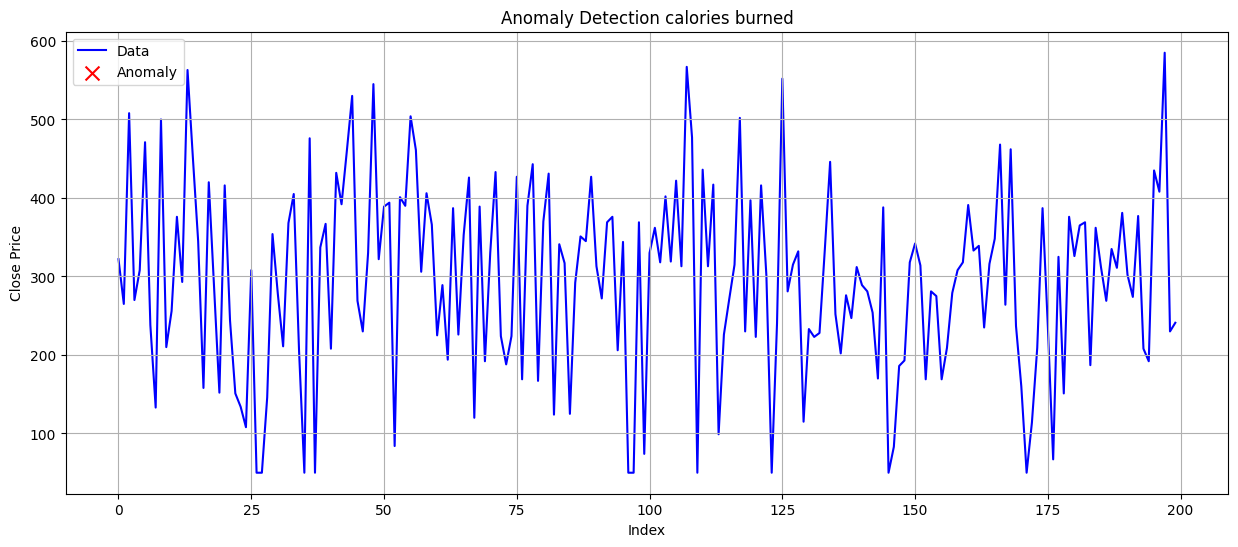

In [53]:
plt.figure(figsize=(15, 6))


plt.plot(df_norm1["calories_burned"].index, df_norm1["calories_burned"], label='Data', color='blue', zorder=1)

plt.scatter(df_norm1_anomalies_for_plotting.index, df_norm1_anomalies_for_plotting, color='red', marker='x', s=100, label='Anomaly', zorder=2)

plt.title('Anomaly Detection calories burned')
plt.xlabel('Index') 
plt.ylabel('Close Price')
plt.legend() 
plt.grid(True) 

plt.show()

### Normal Distribution 2

In [49]:
is_anomaly = df_norm2['Height(Inches)'].isin(df_norm2_anomalies)

df_norm2_anomalies_for_plotting = df_norm2['Height(Inches)'].where(is_anomaly)

Text(0.5, 1.0, 'Histogram of Height (Inches)')

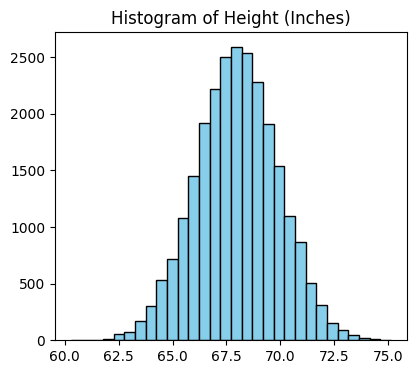

In [54]:
data = df_norm2['Height(Inches)']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, edgecolor='black', color='skyblue')
plt.title(f'Histogram of Height (Inches)')

In [55]:
data_to_test = df_norm2['Height(Inches)']

statistic, p_value = stats.shapiro(data_to_test)

print(f"Shapiro-Wilk Test for df_norm2['Height(Inches)']:\nTest Statistic: {statistic}\nP-value: {p_value}")

Shapiro-Wilk Test for df_norm2['Height(Inches)']:
Test Statistic: 0.9999200734031617
P-value: 0.6626981709245926


### Plotting

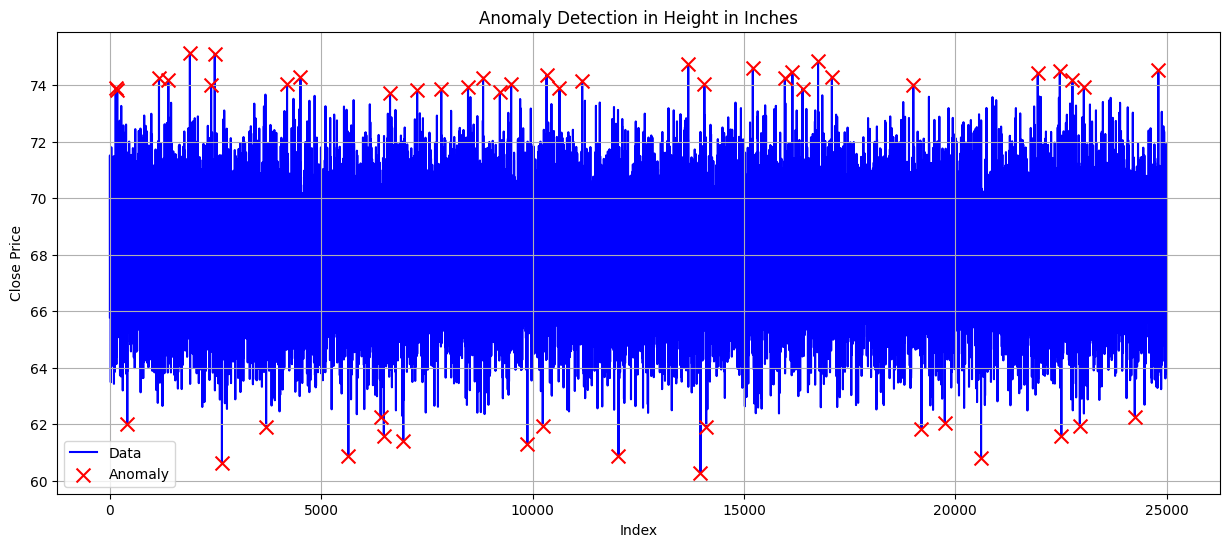

In [52]:
plt.figure(figsize=(15, 6))


plt.plot(df_norm2['Height(Inches)'].index, df_norm2['Height(Inches)'], label='Data', color='blue', zorder=1)

plt.scatter(df_norm2_anomalies_for_plotting.index, df_norm2_anomalies_for_plotting, color='red', marker='x', s=100, label='Anomaly', zorder=2)

plt.title('Anomaly Detection in Height in Inches')
plt.xlabel('Index') 
plt.ylabel('Close Price')
plt.legend() 
plt.grid(True) 

plt.show()

## Conclusion
The 3-sigma method is somewhat robust for normal distributed datasets. For not normal distributed ones it is too restrictive.
I say somewhat robust, because just because the 3-sigma method found no outliers, it doesn't mean there are non, but it's a good first step to find out.
